In [1]:
#Importing libraries
import warnings
import matplotlib.pyplot as plt
import bruges
import numpy as np

### WAVELET CONTRUCTOR

In [2]:
def construct_wavelet(duration, sampling_rate, freq, wavelet_type='ricker'):
    """ Wavelet contructor.

    Args:
        duration (flloat): Wavelet duration in seconds.
        samplin_rate (float): Sampling interval in seconds, normally 0.001. 
        freq (int): Central wavelet frequency in Hz.
        wavelet_type: Can be 'ricker', 'gabor', 'klauder' or 'ormsby'
        
    Returns:
        If return_t set to True. It returns a tuple of wavelet sampled times.
    """
    wave_freq = {'ormsby_freq': [10, 20, 20, 40], 
                 'klauder_freq': [25, 40]}
    
    if wavelet_type == 'ricker':
        w_amplitude, w_time = bruges.filters.wavelets.ricker(duration,
                                            dt=sampling_rate, 
                                            f=freq,
                                            t=None,
                                            return_t=True,
                                            sym=True)
    
    elif wavelet_type == 'gabor':
        w_amplitude, w_time = bruges.filters.wavelets.gabor(duration,
                                            dt = sampling_rate,
                                            f=freq,
                                            t=None,
                                            return_t=True,
                                            sym=True)
        
    elif wavelet_type == 'klauder':
        freq = wave_freq['klauder_freq']
        w_amplitude, w_time = bruges.filters.wavelets.klauder(duration,
                                            dt = sampling_rate,
                                            f=freq,
                                            t=None,
                                            return_t=True,
                                            sym=True)
        
    elif wavelet_type == 'ormsby':
        freq = wave_freq['ormsby_freq']
        w_amplitude, w_time = bruges.filters.wavelets.ormsby(duration,
                                        dt = sampling_rate,
                                        f=freq,
                                        t=None,
                                        return_t=True,
                                        sym=True)
    
    return w_amplitude, w_time, "{} wavelet".format(wavelet_type)

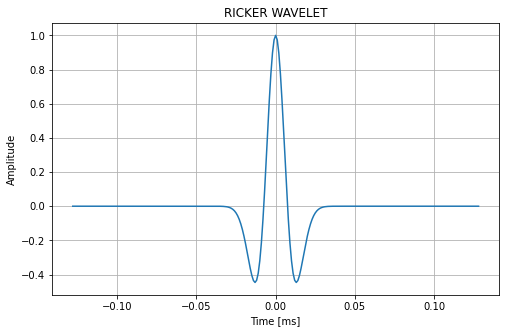

In [3]:
#Testing wavelet contructor
a_w_sampled, t_w_sampled, w_name = construct_wavelet(0.256, 0.001, 30, 'ricker')

plt.figure(figsize=(8, 5))
plt.plot(t_w_sampled, a_w_sampled)
plt.xlabel('Time [ms]'); plt.ylabel('Amplitude'); plt.title(w_name.upper())
plt.grid(True)
plt.show()

### TIME TO FREQUENCY - FOURIER TRANSFORM

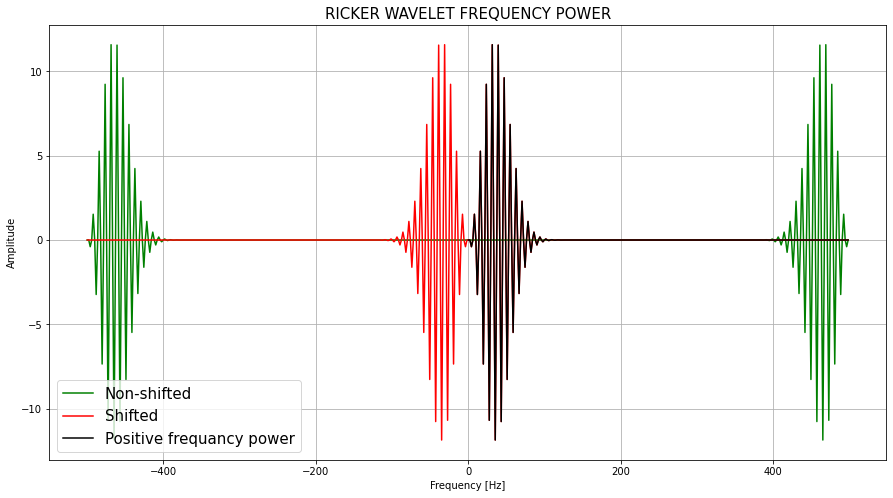

In [4]:
#Wavelet contructor
a_w_sampled, t_w_sampled, w_name = construct_wavelet(0.256, 0.001, 35, 'ricker')


# FROM TIME DOMAIN TO FREQUENCY DOMAIN
#time vector
t_vector = t_w_sampled
dt = t_vector[1]- t_vector[0]  #sampling rate
num_samples_t = len(t_w_sampled)

#frequency vector - nyquist frequency
num_samples_f = int(pow(2, np.ceil(np.log(num_samples_t)/np.log(2))))
df = 1 / (dt * num_samples_f)

#freq sampling
fmin = -0.5 * df * num_samples_f
f_vector = fmin + df * np.arange(0, num_samples_f) #freq vector - allows to visualize the wave and it is linked to the time interval used for sampling 

#wavelet in freq domain
wave_amplitude = np.zeros(num_samples_f)
wave_amplitude[:len(a_w_sampled)] = a_w_sampled

#Amplitude complete power
wave_amplitude_f = np.fft.fft(wave_amplitude)
wave_amplitude_fsh = np.fft.fftshift(wave_amplitude_f)

#Amplitude positive power
w_freq_cropped = f_vector[f_vector>=0]
w_ampl_cropped = wave_amplitude_fsh[f_vector>=0]

#Amplitud Spectum
w_amp_spectrum = np.abs(w_ampl_cropped) / max(np.abs(w_ampl_cropped))

"""
This plot helps visualize what the shitt function does.
Basically it rearanges the frequency spectrum in order
to have the nquist freqs in the center.

"""
import warnings
warnings.filterwarnings("ignore")

#Plotting wave in frequency domain
plt.figure(figsize=(15, 8))
plt.plot(f_vector, wave_amplitude_f.real, color= "g", label='Non-shifted')
plt.plot(f_vector, wave_amplitude_fsh.real, color='r', label='Shifted')
plt.plot(w_freq_cropped, w_ampl_cropped.real, color='black', label='Positive frequancy power')
plt.xlabel('Frequency [Hz]'); plt.ylabel('Amplitude'), plt.title("{} FREQUENCY POWER".format(w_name.upper()), size=15)
plt.grid(True); plt.legend(fontsize=15)
plt.show()


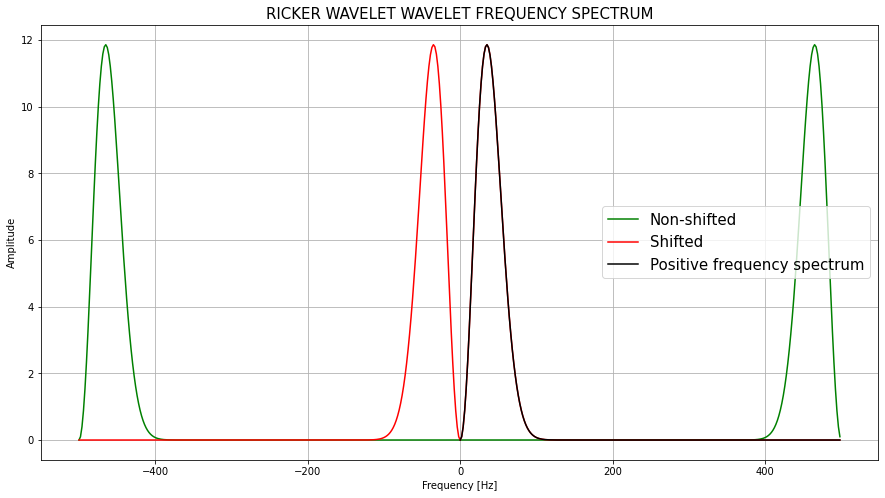

In [5]:
#Plotting wave amplitud spectrum
plt.figure(figsize=(15, 8))
plt.plot(f_vector, np.abs(wave_amplitude_f), color='green', label='Non-shifted')
plt.plot(f_vector, np.abs(wave_amplitude_fsh), color='red', label='Shifted')
plt.plot(w_freq_cropped, np.abs(w_ampl_cropped), color='black', label='Positive frequency spectrum')
plt.xlabel('Frequency [Hz]'); plt.ylabel('Amplitude'), plt.title("{} WAVELET FREQUENCY SPECTRUM".format(w_name.upper()), size=15)
plt.grid(True); plt.legend(fontsize=15)
plt.show()

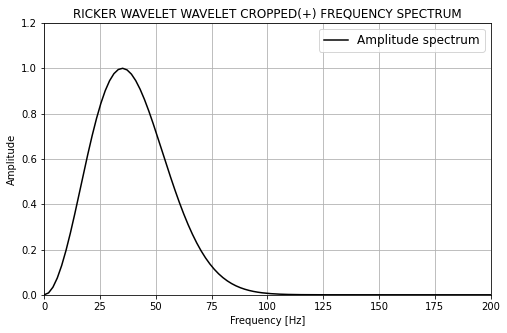

In [6]:
#Plotting cropped amplitude spectrum
plt.figure(figsize=(8, 5))
plt.plot(w_freq_cropped, w_amp_spectrum, color='black', label='Amplitude spectrum')
plt.xlabel('Frequency [Hz]'); plt.ylabel('Amplitude'), plt.title("{} WAVELET CROPPED(+) FREQUENCY SPECTRUM".format(w_name.upper()), size=12)
plt.grid(True); plt.legend(fontsize=12), plt.xlim([0, 200]), plt.ylim([0, 1.2])
plt.show()

In [7]:
#Time to frequency function

def time_to_freq(sampled_time, sampled_amplitude):
    """_summary_

    Args:
        sampled_time (array): wavelet time samples
        sampled_amplitude (array): wavelet amplitude samples
        
    Returns: 
        w_freq_cropped: Real component of the positive frequencies.
        w_ampl_cropped: Amplitudes corresponding to the positive frequencies.
        w_amp_spectrum: Amplitude spectrum based on w_ampl_cropped.
    """
    
    #time vector
    t_vector = sampled_time
    dt = t_vector[1]- t_vector[0]  #sampling rate
    num_samples_t = len(sampled_time)

    #frequency vector - nyquist frequency
    num_samples_f = int(pow(2, np.ceil(np.log(num_samples_t)/np.log(2))))
    df = 1 / (dt * num_samples_f)

    #freq sampling
    fmin = -0.5 * df * num_samples_f
    f_vector = fmin + df * np.arange(0, num_samples_f) #freq vector - allows to visualize the wave and it is linked to the time interval used for sampling 

    #wavelet in freq domain
    wave_amplitude = np.zeros(num_samples_f)
    wave_amplitude[:len(sampled_amplitude)] = sampled_amplitude

    #FOURIER TRANSFORM - Amplitude complete power
    wave_amplitude_f = np.fft.fft(wave_amplitude)
    wave_amplitude_fsh = np.fft.fftshift(wave_amplitude_f)

    #Amplitude positive power
    w_freq_cropped = f_vector[f_vector>=0]
    w_ampl_cropped = wave_amplitude_fsh[f_vector>=0]

    #Amplitud Spectum
    w_amp_spectrum = np.abs(w_ampl_cropped)
    #w_amp_spectrum = np.abs(w_ampl_cropped) / max(np.abs(w_ampl_cropped))
    
    return w_freq_cropped, w_ampl_cropped, w_amp_spectrum


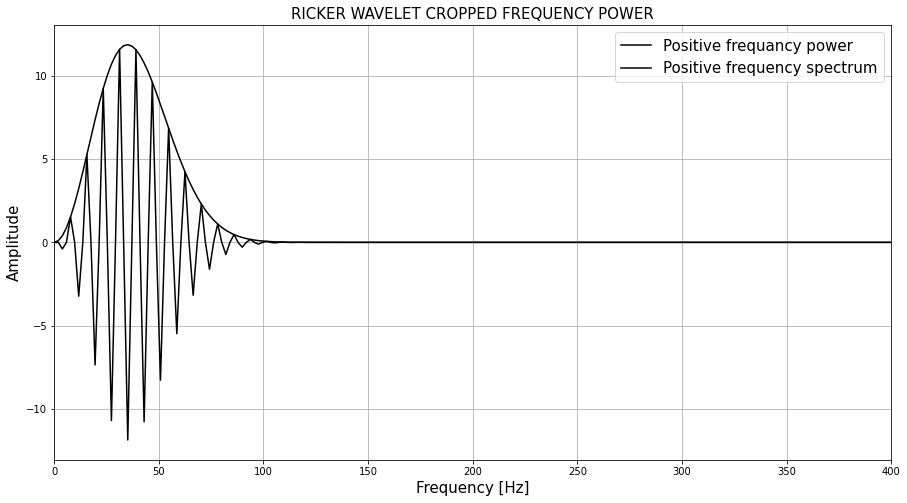

In [44]:
#Testing function

#Wavelet contructor
amp_test, tim_test, name_test = construct_wavelet(0.256, 0.001, 35, 'ricker')

#Testing
w_freq_cropped_test, w_ampl_cropped_test, w_amp_spectrum_test = time_to_freq(sampled_time=tim_test, sampled_amplitude=amp_test)

#Plotting results to compare
plt.figure(figsize=(15, 8))
plt.plot(w_freq_cropped_test, w_ampl_cropped_test.real, color='black', label='Positive frequancy power')
#plt.plot(w_freq_cropped_test, np.abs(w_ampl_cropped_test), color='black', label='Positive frequency spectrum')
plt.plot(w_freq_cropped_test, w_amp_spectrum_test, color='black', label='Positive frequency spectrum')
plt.xlabel('Frequency [Hz]', size=15); plt.ylabel('Amplitude', size=15), plt.title("{} CROPPED FREQUENCY POWER".format(name_test.upper()), size=15)
plt.grid(True); plt.legend(fontsize=15), plt.xlim([0, 400])
plt.show()

### TESTING FOURIER TRANSFORM UNDERSTANDNG

In [9]:
#Waves a sum of harmonic waves
def harmonic_composed(nt=1000, dt=0.001, f1=50, f2=80, a1=0.5, a2=0.7):
    """Makes the sum of two different harmonic signals.

    Args:
        nt (int): Number of samples 
        dt (float): Sampling interval
        f1 (int): Frequency 1
        f2 (int): Frequancy 2
        a1 (float): Amplitude 1
        a1 (float): Amplitude 2
    Returns:
        Amplitude and time [s] samples.
    """

    #Buildiing individual signals
    t_vector = np.linspace(0, (nt-1)*dt, nt)

    w1 = a1 * np.cos(f1 * 2.0 * np.pi * t_vector)
    w2 = a2 * np.cos(f2 * 2.0 * np.pi * t_vector)
    
    w_final = w1 + w2
    
    return t_vector, w_final


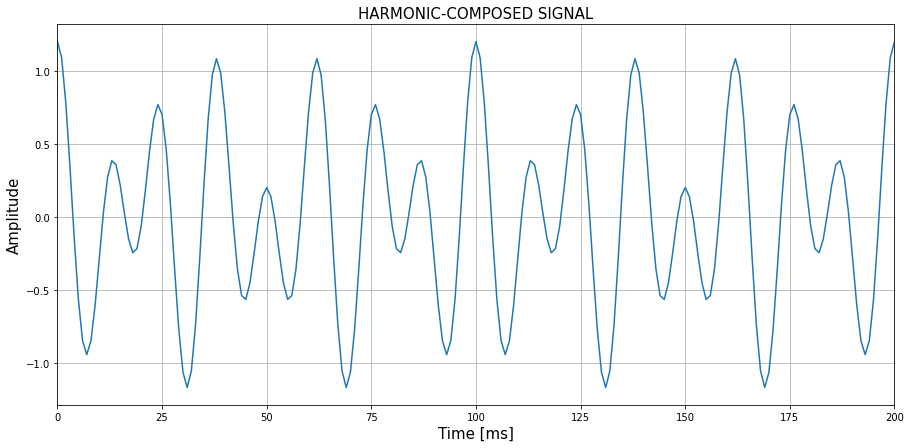

In [101]:
#Plotting composed wave

time_v, ampl_v = harmonic_composed(nt=1000, dt=0.001, f1=50, f2=80, a1=0.5, a2=0.7)

plt.figure(figsize=(15, 7))
plt.plot(time_v*1000, ampl_v)
plt.xlabel('Time [ms]', size=15); plt.ylabel('Amplitude', size=15); plt.title('HARMONIC-COMPOSED SIGNAL', size=15)
plt.xlim([0, 200])
plt.grid(True)

In [78]:
#Applying FFT funtion created before
w_comp_freq_crop, w_comp_amo_crop, w_comp_spect = time_to_freq(sampled_time=time_v, sampled_amplitude=ampl_v)

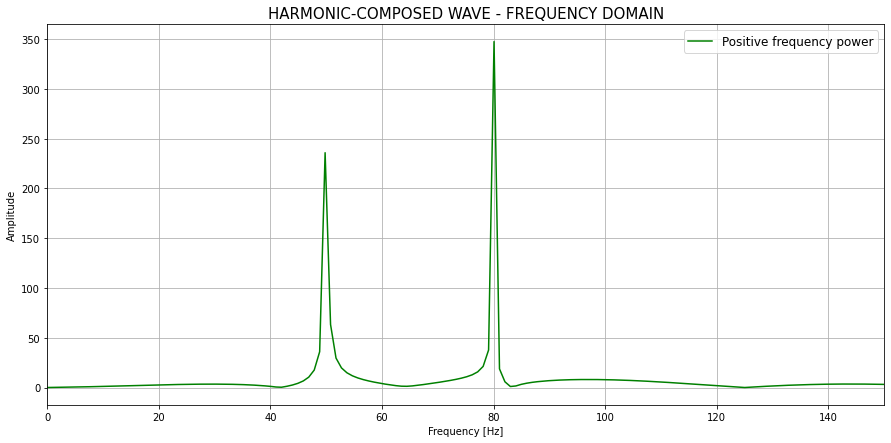

In [100]:
#Plotting wave on the frequency domain
plt.figure(figsize=(15, 7))
plt.plot(w_comp_freq_crop, np.abs(w_comp_amo_crop), color='green', label='Positive frequency power')
plt.xlabel('Frequency [Hz]'); plt.ylabel('Amplitude'), plt.title("HARMONIC-COMPOSED WAVE - FREQUENCY DOMAIN", size=15)
plt.grid(True); plt.legend(fontsize=12), plt.xlim([0, 150])
plt.show()


      Here we can see how the frequency domain projects the amplitudes and frequencies corresponding to
      the ones osed to make up the harmonic compsed wave on the time domain:
      freq1=50, freq2=80
      amp1=0.5, amp2=0.7
      


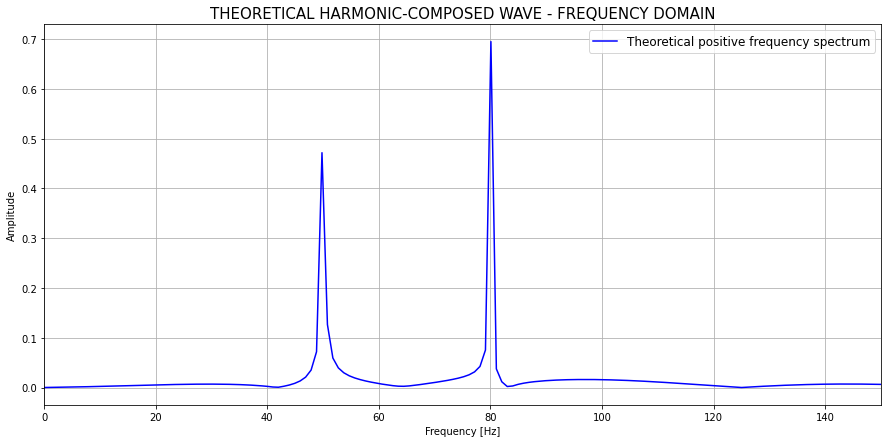

In [104]:
#True theoretical FFT

w_comp_amo_theo = 2.0 * np.abs(w_comp_amo_crop/1000)

print("""
      Here we can see how the frequency domain projects the amplitudes and frequencies corresponding to
      the ones osed to make up the harmonic compsed wave on the time domain:
      freq1=50, freq2=80
      amp1=0.5, amp2=0.7
      """)

#Plotting wave amplitud spectrum
plt.figure(figsize=(15, 7))
plt.plot(w_comp_freq_crop, w_comp_amo_theo, color='blue', label='Theoretical positive frequency spectrum')
plt.xlabel('Frequency [Hz]'); plt.ylabel('Amplitude'), plt.title("THEORETICAL HARMONIC-COMPOSED WAVE - FREQUENCY DOMAIN", size=15)
plt.grid(True); plt.legend(fontsize=12), plt.xlim([0, 150])
plt.show()

